<a href="https://colab.research.google.com/github/satishgc227/Derby-project/blob/main/Kmeans%2CPCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
# Load in the data
df = pd.read_csv('/content/edited complete.csv',encoding='latin',nrows=10000)



In [2]:
df['race_type\xa0'].unique()
df['course_type'].unique()
df['track_condition\xa0'].unique()
df['track_id'].unique()

s=df[['race_type\xa0','course_type','track_condition\xa0','track_id']]

In [3]:
ohe=OneHotEncoder()
feature_array=ohe.fit_transform(df[['race_type\xa0','course_type','track_condition\xa0','track_id']]).toarray()

In [4]:
feature_labels=ohe.categories_
print(feature_labels)

[array(['ALW', 'AOC', 'CLM', 'SST'], dtype=object), array(['D', 'I', 'M', 'O', 'T'], dtype=object), array(['FM ', 'FT ', 'GD ', 'MY ', 'SY '], dtype=object), array(['AQU', 'BEL', 'SAR'], dtype=object)]


In [5]:
np.hstack(feature_labels)

array(['ALW', 'AOC', 'CLM', 'SST', 'D', 'I', 'M', 'O', 'T', 'FM ', 'FT ',
       'GD ', 'MY ', 'SY ', 'AQU', 'BEL', 'SAR'], dtype=object)

In [6]:
feature_labels=np.hstack(feature_labels)
f=pd.DataFrame(feature_array,columns=feature_labels)
pd.concat([df,f],axis=1)

,track_id,race_date,race_number,program_number,trakus_index,latitude,longitude,distance_id,course_type,track_condition,...,O,T,FM,FT,GD,MY,SY,AQU,BEL,SAR
0,AQU,01-01-2019,9,6,73,40.672946,-73.827587,600,D,GD,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,AQU,01-01-2019,9,6,74,40.672990,-73.827568,600,D,GD,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,AQU,01-01-2019,9,6,63,40.672510,-73.827781,600,D,GD,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,AQU,01-01-2019,9,6,64,40.672553,-73.827762,600,D,GD,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,AQU,01-01-2019,9,6,65,40.672596,-73.827742,600,D,GD,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,BEL,15-09-2019,9,9,251,40.714156,-73.725067,700,T,FM,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9996,BEL,15-09-2019,9,9,252,40.714142,-73.725013,700,T,FM,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9997,BEL,15-09-2019,9,9,253,40.714127,-73.724959,700,T,FM,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9998,BEL,15-09-2019,9,9,254,40.714113,-73.724905,700,T,FM,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [7]:
df.drop(['race_date','track_id','course_type','track_condition\xa0','race_type\xa0','jockey\xa0','program_number\xa0'],axis=1,inplace=True)
df=pd.concat([df,f],axis=1)

In [8]:
df.isnull().any()


race_number            False
trakus_index           False
latitude               False
longitude              False
distance_id            False
run_up_distance        False
purse                  False
post_time              False
weight_carried         False
odds                   False
position_at_finish     False
ALW                    False
AOC                    False
CLM                    False
SST                    False
D                      False
I                      False
M                      False
O                      False
T                      False
FM                     False
FT                     False
GD                     False
MY                     False
SY                     False
AQU                    False
BEL                    False
SAR                    False
dtype: bool

Removing the null values

In [9]:
df.replace([np.inf,-np.inf],np.nan ,inplace=True)
df.dropna(inplace=True)
df.isnull().any()

race_number            False
trakus_index           False
latitude               False
longitude              False
distance_id            False
run_up_distance        False
purse                  False
post_time              False
weight_carried         False
odds                   False
position_at_finish     False
ALW                    False
AOC                    False
CLM                    False
SST                    False
D                      False
I                      False
M                      False
O                      False
T                      False
FM                     False
FT                     False
GD                     False
MY                     False
SY                     False
AQU                    False
BEL                    False
SAR                    False
dtype: bool

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-2.937055,-1.783390,-0.968456,0.187720,1.664117,1.233308,0.144967,-0.481952,0.292894,0.375519,-0.129089,-0.593056,0.914671,-1.335012,-0.215938
1,-2.935940,-1.783399,-0.968563,0.187555,1.663709,1.233048,0.145186,-0.482941,0.293878,0.373931,-0.124571,-0.592698,0.915112,-1.334539,-0.215857
2,-2.948196,-1.783311,-0.967379,0.189370,1.668198,1.235907,0.142772,-0.472058,0.283046,0.391399,-0.174272,-0.596637,0.910257,-1.339742,-0.216749
3,-2.947082,-1.783318,-0.967487,0.189205,1.667789,1.235647,0.142991,-0.473047,0.284031,0.389811,-0.169754,-0.596279,0.910699,-1.339269,-0.216668
4,-2.945968,-1.783326,-0.967595,0.189040,1.667381,1.235387,0.143211,-0.474037,0.285016,0.388223,-0.165235,-0.595921,0.911140,-1.338796,-0.216587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-1.245955,3.568501,3.596716,-0.404281,1.132924,-0.214310,-1.545279,-1.028268,2.041355,1.049626,0.374711,0.496213,-0.088455,-0.006789,0.385953
9996,-1.244789,3.568814,3.596576,-0.404575,1.132522,-0.214602,-1.544947,-1.029260,2.042331,1.048089,0.379239,0.496520,-0.088061,-0.006303,0.385951
9997,-1.243621,3.569133,3.596435,-0.404872,1.132121,-0.214895,-1.544614,-1.030253,2.043307,1.046553,0.383768,0.496827,-0.087669,-0.005817,0.385948
9998,-1.242455,3.569446,3.596295,-0.405165,1.131719,-0.215188,-1.544282,-1.031245,2.044284,1.045016,0.388297,0.497134,-0.087276,-0.005331,0.385946


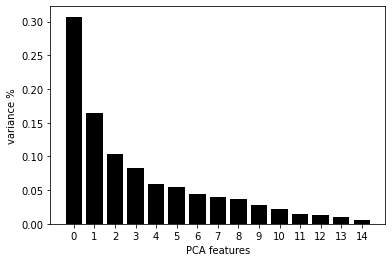

In [10]:
# Standardize the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(df)
# Create a PCA instance: pca
pca = PCA(n_components=15)
principalComponents = pca.fit_transform(X_std)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)
PCA_components

Text(0, 0.5, 'PCA 2')

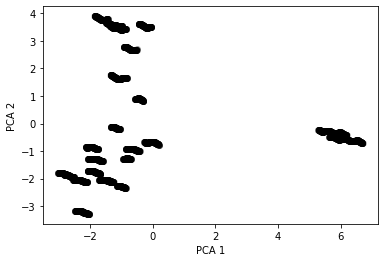

In [11]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [12]:
pca.explained_variance_

array([8.60266418, 4.61060945, 2.91039539, 2.33871884, 1.66370617,
       1.54830755, 1.24810631, 1.12363161, 1.03887143, 0.79524908,
       0.6030335 , 0.41529772, 0.34551844, 0.28320443, 0.16111065])

In [13]:
pca.explained_variance_ratio_

array([0.30720728, 0.16464816, 0.1039323 , 0.08351732, 0.05941214,
       0.05529117, 0.04457077, 0.04012569, 0.03709884, 0.02839891,
       0.02153476, 0.01483058, 0.01233871, 0.01011343, 0.00575338])

explained_variance plot

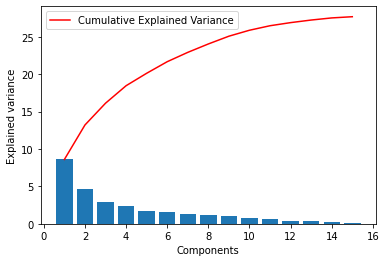

In [14]:
plt.bar(range(1,len(pca.explained_variance_ )+1),pca.explained_variance_ )
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(pca.explained_variance_ )+1),
         np.cumsum(pca.explained_variance_),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left')

explained_variance_ratio_ plot

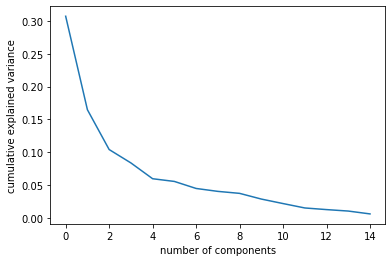

In [15]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()


#PCA1 is at 0 in xscale

Scree plot
Scree plot is nothing but plot of eigen values(explained_variance_) for each of the components.

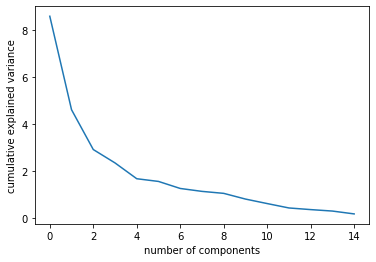

In [16]:
plt.plot(pca.explained_variance_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

It can be seen from plots that, PCA-1 explains most of the variance than subsequent components. In other words, most of the features are explained and encompassed by PCA1

Text(0, 0.5, 'PCA 2')

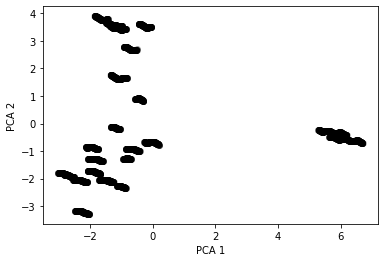

In [17]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

Effect of variables on each components
components_ attribute provides principal axes in feature space, representing the directions of maximum variance in the data. This means, we can see influence on each of the components by features.

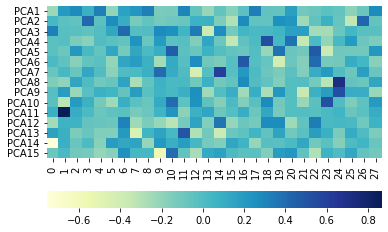

In [18]:
import seaborn as sns
ax = sns.heatmap(pca.components_,
                 cmap='YlGnBu',
                 yticklabels=[ "PCA"+str(x) for x in range(1,pca.n_components_+1)],
                 #xticklabels=list(x.columns),
                 cbar_kws={"orientation": "horizontal"})


In [19]:
#def myplot(score,coeff,labels=None):
 #   xs = score[:,0]
  #  ys = score[:,1]
   # n = coeff.shape[0]
    #scalex = 1.0/(xs.max() - xs.min())
#    scaley = 1.0/(ys.max() - ys.min())
 #   plt.scatter(xs * scalex,ys * scaley,s=5)
  #  for i in range(n):
   #     plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
    #    if labels is None:
     #       plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
      #  else:
       #     plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    #plt.xlabel("PC{}".format(1))
    #plt.ylabel("PC{}".format(2))
    #plt.grid()

#myplot(principalComponents[:,0:2],np.transpose(pca.components_[0:2, :]))
#plt.show()

In [20]:
km=KMeans()

wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    
    km.fit_predict(df)
    wcss.append(km.inertia_)
    print('For', i,'Cluster,', np.around(km.inertia_,2),'is the WCSS.')

For 1 Cluster, 2572358230801.51 is the WCSS.
For 2 Cluster, 576472942761.14 is the WCSS.
For 3 Cluster, 300725918816.3 is the WCSS.
For 4 Cluster, 182011999945.56 is the WCSS.
For 5 Cluster, 101193734267.06 is the WCSS.
For 6 Cluster, 74395140868.94 is the WCSS.
For 7 Cluster, 52413783315.73 is the WCSS.
For 8 Cluster, 38160832594.33 is the WCSS.
For 9 Cluster, 30194680461.9 is the WCSS.
For 10 Cluster, 25151987002.51 is the WCSS.


In [21]:
import plotly.express as px
fig = px.line(x = range(1,11),
              y=wcss, 
              template='simple_white',
              title = 'Elbow Plot', markers=True,
             color_discrete_sequence=["skyblue"])

fig.update_layout(xaxis_title="Clusters",yaxis_title=" WCSS")


fig.show()

In [22]:
km = KMeans(n_clusters=6)
y_means = km.fit_predict(df)
y_means

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

In [23]:
#df['Target'] = y_means
#X = df[df.columns[:-1]].values
#y = df[df.columns[-1]].values
#y.shape

Deep learning using position_at_finish as the target variable

In [24]:
pip install movecolumn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
import movecolumn as mc
mc.MoveToLast(df,'position_at_finish\xa0')

,race_number,trakus_index,latitude,longitude,distance_id,run_up_distance,purse,post_time,weight_carried,odds,...,T,FM,FT,GD,MY,SY,AQU,BEL,SAR,position_at_finish
0,9,73,40.672946,-73.827587,600,48,25000,420,120,2090,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,8
1,9,74,40.672990,-73.827568,600,48,25000,420,120,2090,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,8
2,9,63,40.672510,-73.827781,600,48,25000,420,120,2090,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,8
3,9,64,40.672553,-73.827762,600,48,25000,420,120,2090,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,8
4,9,65,40.672596,-73.827742,600,48,25000,420,120,2090,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9,251,40.714156,-73.725067,700,117,70000,522,114,1660,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9
9996,9,252,40.714142,-73.725013,700,117,70000,522,114,1660,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9
9997,9,253,40.714127,-73.724959,700,117,70000,522,114,1660,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9
9998,9,254,40.714113,-73.724905,700,117,70000,522,114,1660,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9


In [26]:
X=df[df.columns[:-1]]
X

,race_number,trakus_index,latitude,longitude,distance_id,run_up_distance,purse,post_time,weight_carried,odds,...,O,T,FM,FT,GD,MY,SY,AQU,BEL,SAR
0,9,73,40.672946,-73.827587,600,48,25000,420,120,2090,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,9,74,40.672990,-73.827568,600,48,25000,420,120,2090,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,9,63,40.672510,-73.827781,600,48,25000,420,120,2090,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,9,64,40.672553,-73.827762,600,48,25000,420,120,2090,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,9,65,40.672596,-73.827742,600,48,25000,420,120,2090,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9,251,40.714156,-73.725067,700,117,70000,522,114,1660,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9996,9,252,40.714142,-73.725013,700,117,70000,522,114,1660,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9997,9,253,40.714127,-73.724959,700,117,70000,522,114,1660,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9998,9,254,40.714113,-73.724905,700,117,70000,522,114,1660,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [27]:
y=df[df.columns[-1]]

In [28]:
y

0       8
1       8
2       8
3       8
4       8
       ..
9995    9
9996    9
9997    9
9998    9
9999    9
Name: position_at_finish , Length: 10000, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, X_test.shape)

(8000, 27) (2000, 27) (8000,) (2000, 27)


In [30]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


In [31]:
model=Sequential()
model.add(Dense(38,activation='relu',input_dim=38)) #input layer
model.add(Dropout(0.3))
model.add(Dense(38,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 38)                1482      
                                                                 
 dropout (Dropout)           (None, 38)                0         
                                                                 
 dense_1 (Dense)             (None, 38)                1482      
                                                                 
 dropout_1 (Dropout)         (None, 38)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 39        
                                                                 
Total params: 3,003
Trainable params: 3,003
Non-trainable params: 0
_________________________________________________________________


In [32]:
optimizer=keras.optimizers.Adam(learning_rate=0.0001)
callback=EarlyStopping(monitor='val_loss', min_delta=0.0001,
    patience=5,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False)

In [33]:
model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [34]:
history=model.fit(X_train,y_train,batch_size=20, epochs=100,
                    validation_data = (X_test,y_test), verbose=1, callbacks=callback)

Epoch 1/100


ValueError: ignored

In [35]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (15, 10)

from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from imblearn.over_sampling  import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score,precision_score,f1_score

scaler = StandardScaler()
X= scaler.fit_transform(X)

In [36]:
from sklearn import decomposition 
pca = decomposition.PCA(0.90)
print("Shape of X before PCA -", X.shape)
X = pca.fit_transform(X)
print("Shape of X after PCA -", X.shape)
X

Shape of X before PCA - (10000, 27)
Shape of X after PCA - (10000, 9)


array([[-2.77560691, -1.73972307, -1.27356989, ...,  0.64995101,
        -0.41215438,  0.32717716],
       [-2.77449146, -1.73971953, -1.27367162, ...,  0.6499871 ,
        -0.41317117,  0.3281471 ],
       [-2.78676186, -1.73977042, -1.27255093, ...,  0.64958705,
        -0.40198573,  0.31747719],
       ...,
       [-1.04382693,  3.8210562 ,  3.05294385, ..., -1.28227167,
        -1.14363469,  1.95820353],
       [-1.04266305,  3.82138302,  3.05278619, ..., -1.2821571 ,
        -1.14465371,  1.95916299],
       [-1.04149673,  3.8217224 ,  3.05262623, ..., -1.28203956,
        -1.14567254,  1.96012162]])

In [37]:
oversample = RandomOverSampler(sampling_strategy='minority')
X, y = oversample.fit_resample(X, y)

In [38]:
print('X Shape -', X.shape)
print('y Shape -',y.shape)

X Shape - (12504, 9)
y Shape - (12504,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [39]:
names=['LogisticRegression' ,'KNN','Linear_SVM','XGB_Classifier','Random_Forest']
names

['LogisticRegression', 'KNN', 'Linear_SVM', 'XGB_Classifier', 'Random_Forest']

In [40]:

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [41]:
classifiers=[
    LogisticRegression(solver='liblinear',penalty='l2' ,n_jobs=12 ,random_state=0),
    KNeighborsClassifier(n_neighbors=3),
    SVC(kernel='linear',C=0.025),
    XGBClassifier(objective='binary:hinge'),
    RandomForestClassifier(max_depth=5,n_estimators=100)]

In [ ]:
modelscores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    modelscores.append(score)
modelscores 

In [ ]:
scores_df=pd.DataFrame(columns=['names','modelscores'])
scores_df['names']=names
scores_df['modelscores']=modelscores

scores_df
scores_df.sort_values('modelscores',ascending=False)